# Generate our KNN MultiGraph derived from Cosine Similarity analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import networkx as nx
import re
import matplotlib.pyplot as plt 

# all my graph functions
from graphUtils import *

In [3]:
input_dir = "../data/knnMatrices/"
output_dir = "../data/graphs/"

In [5]:
files = os.listdir(input_dir)
files

['chart events_activity.csv',
 'chart events_demographics.csv',
 'chart events_diet.csv',
 'chart events_heart lung.csv',
 'chart events_medical history.csv',
 'chart events_pain.csv',
 'chart events_physical assessment.csv',
 'lab tests_antibodies.csv',
 'lab tests_blood.csv',
 'lab tests_breakdown products.csv',
 'lab tests_enzymes.csv',
 'lab tests_hepatitis.csv',
 'lab tests_other lab.csv',
 'lab tests_proteins.csv']

In [6]:
# load and create our edges dataframe
g_df = None
for f in files:
    # generate partial dataframe
    data_group = re.search("_(.*)\\.", f).group(1)
    data_type = re.search("(.*)_", f).group(1)
    print(f, data_group, data_type)
    
    tmp_df = pd.read_csv(input_dir + f)
    tmp_df['data_group'] = data_group
    tmp_df['data_type'] = data_type
    
    # add to graph dataframe
    if g_df is None:
        g_df = tmp_df
    else:
        g_df = pd.concat([g_df, tmp_df], axis = 0)
        
# rename similarity as weight
g_df = g_df.rename(columns = {'similarity':'weight'})
g_df.head()

chart events_activity.csv activity chart events
chart events_demographics.csv demographics chart events
chart events_diet.csv diet chart events
chart events_heart lung.csv heart lung chart events
chart events_medical history.csv medical history chart events
chart events_pain.csv pain chart events
chart events_physical assessment.csv physical assessment chart events
lab tests_antibodies.csv antibodies lab tests
lab tests_blood.csv blood lab tests
lab tests_breakdown products.csv breakdown products lab tests
lab tests_enzymes.csv enzymes lab tests
lab tests_hepatitis.csv hepatitis lab tests
lab tests_other lab.csv other lab lab tests
lab tests_proteins.csv proteins lab tests


,patient_1,patient_2,weight,rank,data_group,data_type
0,4,29573,0.982752,1.0,activity,chart events
1,4,4699,0.963890,2.0,activity,chart events
2,4,31535,0.953409,3.0,activity,chart events
3,4,57317,0.945740,4.0,activity,chart events
4,4,12119,0.940062,5.0,activity,chart events


In [7]:
# develop our graph - needs to essentially be done manually 
k = 5
sub_g_df = g_df[g_df['rank'] <= k]

G = genMultiDiGraph(sub_g_df)
G

In [8]:
sub_g_df.sort_values(by = ["patient_1", "rank"])

,patient_1,patient_2,weight,rank,data_group,data_type
0,4,29573,0.982752,1.0,activity,chart events
0,4,117,0.996620,1.0,demographics,chart events
0,4,21575,0.881409,1.0,diet,chart events
1,4,28889,0.881409,1.0,diet,chart events
0,4,6800,0.429710,1.0,heart lung,chart events
...,...,...,...,...,...,...
306825,99923,86018,0.982957,5.0,physical assessment,chart events
282304,99923,81328,0.889166,5.0,blood,lab tests
267904,99923,96370,0.886384,5.0,breakdown products,lab tests
273304,99923,92212,0.845832,5.0,enzymes,lab tests


In [9]:
# save our graph
nx.write_gpickle(G,output_dir + "cosineGraph_K5.pkl")

In [9]:
# let's explore a graph with just breakdown products
H = genMultiDiGraph(sub_g_df, ['blood'])
H

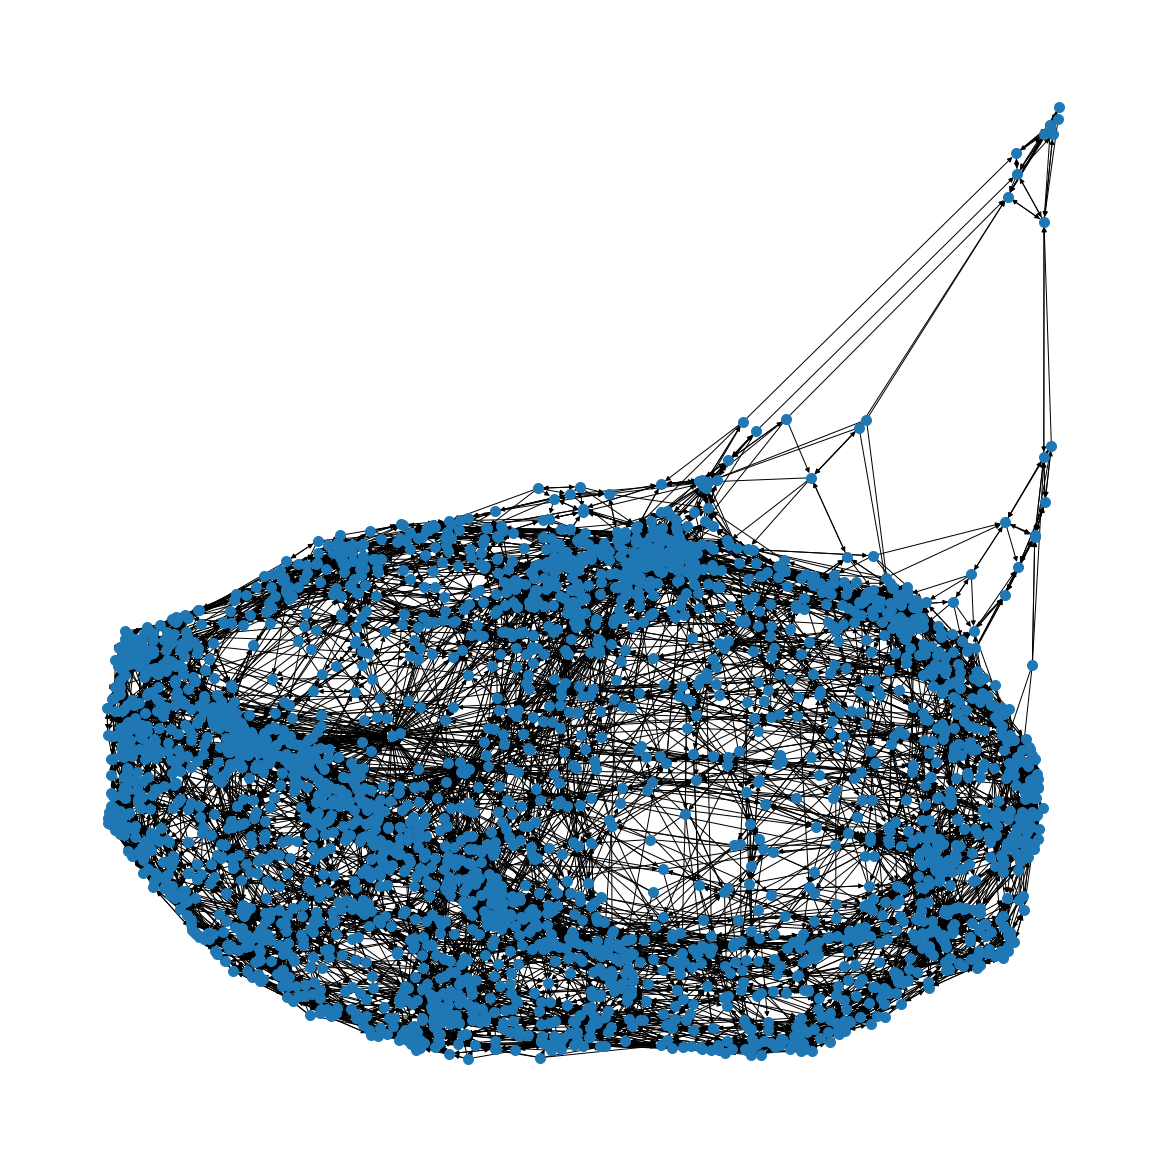

In [10]:
plt.figure(1, (16,16))
nx.draw_spectral(H, node_size = 100)
plt.savefig(output_dir + "spectral_K5_blood_cosine.png")

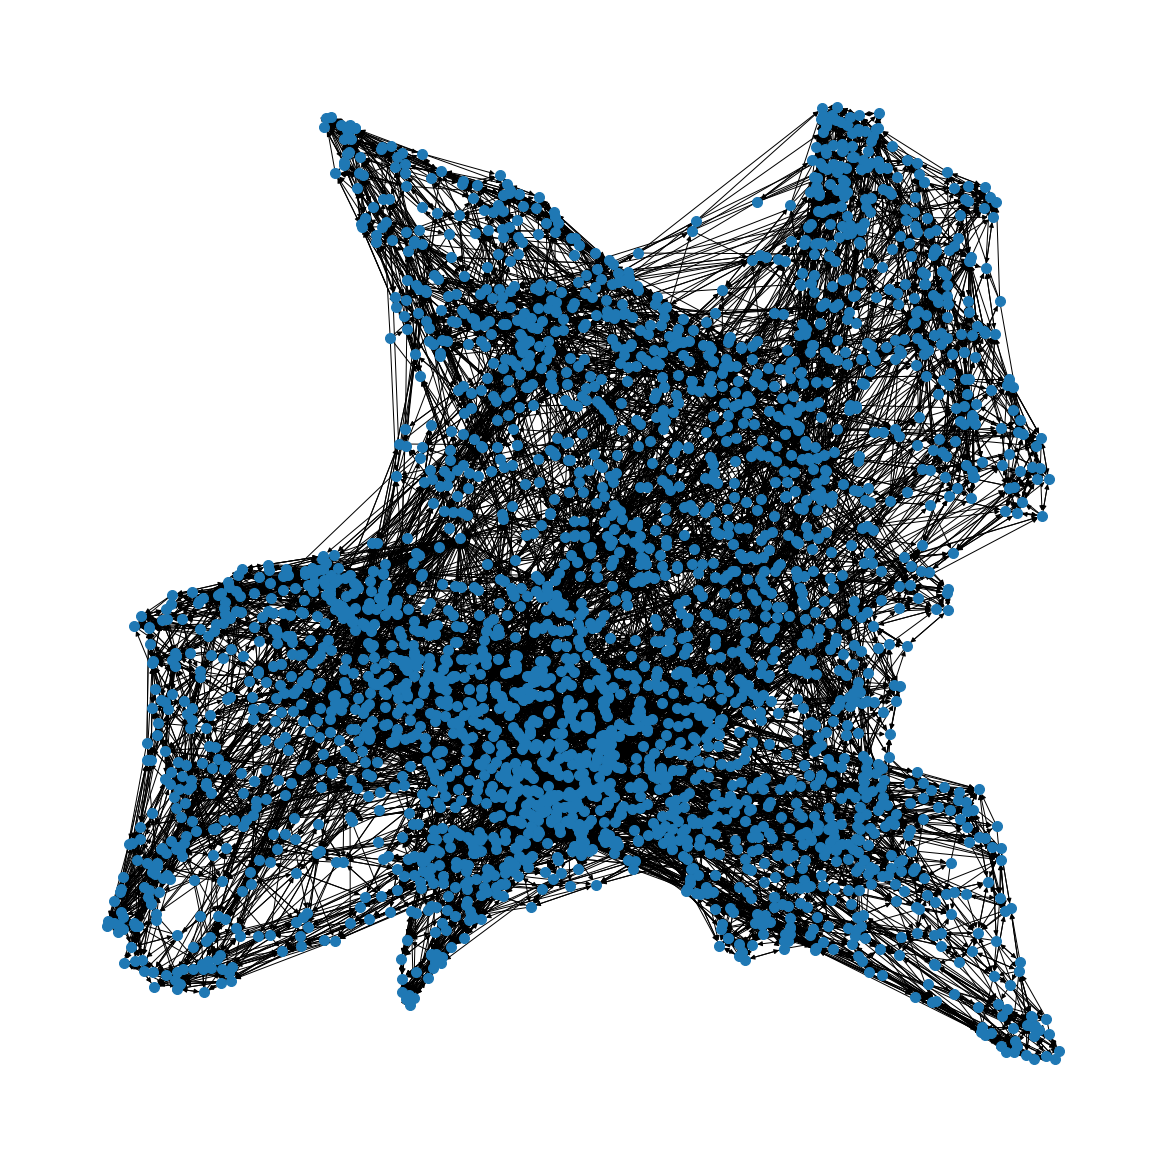

In [11]:
plt.figure(1, (16,16))
nx.draw(H, node_size = 100)
plt.savefig(output_dir + "draw_K5_breakdown products_cosine.png")